# Prudential Life Insurance Assessment

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Get the Data

In [2]:
df = pd.read_csv('E:/AdvAnal/python_103/1_Data/17_fin_train.csv')
dft = pd.read_csv('E:/AdvAnal/python_103/1_Data/17_fin_test.csv')
df['row_num'] = df.index.get_values()

In [3]:
train = df[(df['row_num'] < 40000) | (df['row_num'] >= 50000)].copy()
train = train.drop('row_num', 1).copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49381 entries, 0 to 59380
Data columns (total 8 columns):
y        49381 non-null int64
41_df    49381 non-null int64
42_df    49381 non-null int64
43_df    49381 non-null int64
44_df    49381 non-null int64
45_df    49381 non-null int64
46_df    49381 non-null int64
49_df    49381 non-null int64
dtypes: int64(8)
memory usage: 3.4 MB


In [4]:
test = df[(df['row_num'] >= 40000) & (df['row_num'] < 50000)].copy()
test = test.drop('row_num', 1).copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 40000 to 49999
Data columns (total 8 columns):
y        10000 non-null int64
41_df    10000 non-null int64
42_df    10000 non-null int64
43_df    10000 non-null int64
44_df    10000 non-null int64
45_df    10000 non-null int64
46_df    10000 non-null int64
49_df    10000 non-null int64
dtypes: int64(8)
memory usage: 703.1 KB


In [5]:
sub = dft
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 8 columns):
Id       19765 non-null int64
41_df    19765 non-null int64
42_df    19765 non-null int64
43_df    19765 non-null int64
44_df    19765 non-null int64
45_df    19765 non-null int64
46_df    19765 non-null int64
49_df    19765 non-null int64
dtypes: int64(8)
memory usage: 1.2 MB


# Clean the Data

In [6]:
cat_feats = ['41_df', '42_df', '43_df', '44_df', '45_df', '46_df', '49_df']

In [7]:
y_train = train['y'].copy()
x_train = train.drop('y', 1).copy()
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True).copy()

In [8]:
y_test = test['y'].copy()
x_test = test.drop('y', 1).copy()
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True).copy()

In [17]:
y_df = df['y'].copy()
x_df = df.drop('y', 1).copy()
x_df = x_df.drop('row_num', 1).copy()
x_df = pd.get_dummies(x_df,columns=cat_feats,drop_first=True).copy()

In [10]:
y_sub = sub['Id'].copy()
x_sub = sub.drop('Id', 1).copy()
x_sub = pd.get_dummies(x_sub,columns=cat_feats,drop_first=True).copy()

# XG Boost

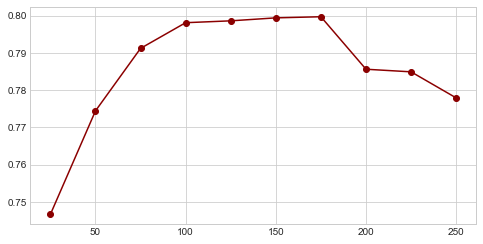

In [11]:
results = []
n_estimaor_options = [25,50,75,100,125,150,175,200,225,250]
for trees in n_estimaor_options:
    model = XGBClassifier(objective='binary:logistic', n_estimators=trees, seed=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

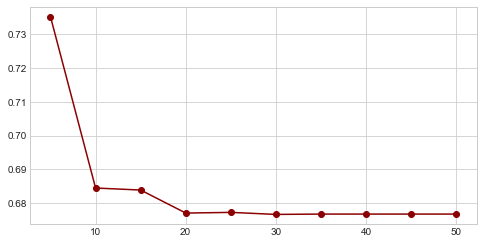

In [12]:
results = []
n_max_depth = [5,10,15,20,25,30,35,40,45,50]
for trees in n_max_depth:
    model = XGBClassifier(objective='binary:logistic', n_estimators=175, max_depth = trees, seed=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_max_depth).plot(color="darkred",marker="o")

In [13]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=175, max_depth=15, seed=101)
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)

In [14]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[ 839    5    4    9    6   35   28  104]
 [ 146  450   18    9  300   34   39   93]
 [   8   17  148    5    0    0    0    2]
 [   8    3   17  200    0    5    1    7]
 [  43  103    0    0  513  170   18   64]
 [ 105  108    1    3   82 1090  205  316]
 [  37   27    0    0    9  233  645  423]
 [  22   19    0    0    5  122  143 2954]]
accuracy: 0.895138888889
precision: 0.989010989011
recall: 0.755033557047
f1 score:  0.856327307326


# Output

In [20]:
y_df=pd.DataFrame(xgb.predict(x_df))
y_df.rename(columns={0: '51_df'}, inplace=True)
y_df.to_csv('51_df.csv')

In [21]:
Response=pd.DataFrame(xgb.predict(x_sub))
sub = pd.concat([y_sub,Response],axis=1)
sub.rename(columns={0: 'Response'}, inplace=True)
sub.to_csv('51_sub.csv',index = False)